In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import _pickle as cPickle
import json

sys.path.insert(1, '/home/kbrennan/cell_tracker/')
from cell_tracker import Cell, filter_cells_lifespan, remove_dublicate_cells

sys.path.insert(1, '/home/kbrennan/phd/scripts')

import plotting.plot_utils as pu
pu.figure_setup()

In [2]:
day = '20210628'
new_path = '/home/kbrennan/phd/data/climate/tracks/present/test/cell_tracks_'+day+'.json'
old_path = '/home/kbrennan/phd/data/climate/tracks/present/cell_tracks_'+day+'.json'

with open(new_path, 'r') as f:
    new_data = json.load(f)

with open(old_path, 'r') as f:
    old_data = json.load(f)
    

cells_new = new_data['cell_data']
cells_old = old_data['cell_data']


In [3]:
cells_new = [cell for cell in cells_new if cell['lifespan'] > 30]

In [4]:
print(len(cells_new))
print(len(cells_old))

1873
450


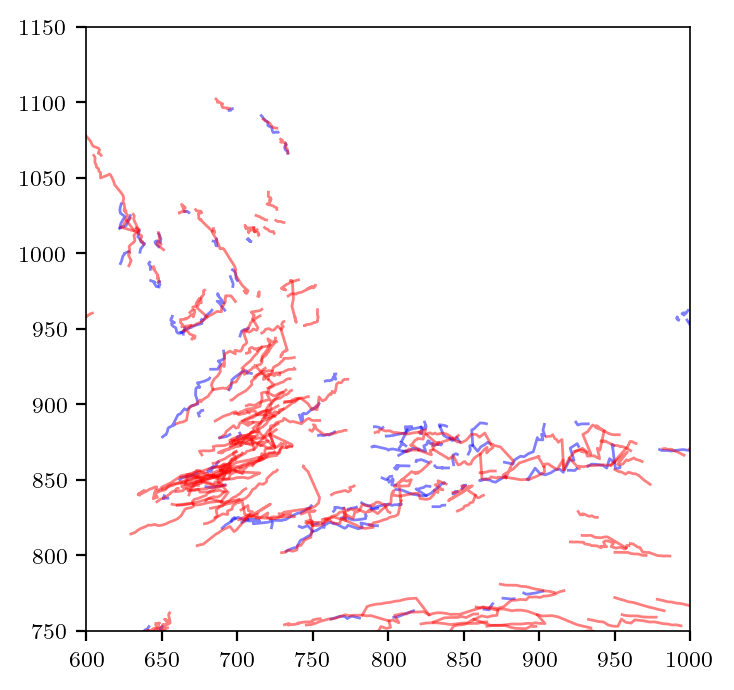

In [5]:
for cell in cells_old:
    plt.plot(cell['mass_center_x'], cell['mass_center_y'], color='b', alpha=0.5)

for cell in cells_new:
    plt.plot(cell['mass_center_x'], cell['mass_center_y'], color='r', alpha=0.5)

plt.xlim(600, 1000)
plt.ylim(750,1150)

# equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')